In [7]:
import numpy as np
import random
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
class first_assignment:
    
    def __init__(self, parameter_C, parameter_Q, parameter_N, parameter_B, parameter_S):
        self.parameter_C = parameter_C
        self.parameter_Q = parameter_Q
        self.parameter_N = parameter_N
        self.parameter_B = parameter_B
        self.parameter_S = parameter_S
    
    def RMSE(self, image1, image2):
        return np.float(np.sqrt(((image1 - image2)**2).mean()))

    def digitize(self, image):
        z = []
        size = (self.parameter_N, self.parameter_N)

        if (len(image) % self.parameter_N == 0):
            for i in range(0, len(image), int(len(image)/self.parameter_N)):
                for j in range(0, len(image), int(len(image)/self.parameter_N)):
                    z.append(image[i][j])
        else:
            for i in range(self.parameter_N):
                for j in range(self.parameter_N):
                    z.append(image[i][j])            
        return np.reshape(np.array(z), size)
    
    def normalize_float(self, image):
        min_ = np.min(image)
        max_ = np.max(image)
        normalized_image = (((image - min_)/(max_ - min_))*65535).astype(np.uint16)
        return normalized_image
    
    def quantization(self, image):
        min_ = np.min(image)
        max_ = np.max(image)
        quantized_image = (((image - min_)/(max_ - min_))*255).astype(np.uint8)
        return quantized_image
    
    def bit_shift(self, image):
        return image >> (8-self.parameter_B)
    
    def function_1(self):
        image = np.zeros([self.parameter_C, self.parameter_C])
        for x in range(self.parameter_C):
            for y in range(self.parameter_C):
                image[x,y] = x*y + 2*y
        
        image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))
    
    def function_2(self):
        image = np.zeros([self.parameter_C, self.parameter_C])
        for x in range(self.parameter_C):
            for y in range(self.parameter_C):
                image[x,y] = np.abs(np.cos(x/self.parameter_Q) + 2* np.sin(y/self.parameter_Q))
        image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))
    
    def function_3(self):
        image = np.zeros([self.parameter_C, self.parameter_C])
        for x in range(self.parameter_C):
            for y in range(self.parameter_C):
                image[x,y] = np.abs(3*(x/self.parameter_Q) - np.cbrt(y/self.parameter_Q))
        image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))
    
    def function_4(self):
        np.random.seed(self.parameter_S)
        image = np.random.randint(0,2,[self.parameter_C,self.parameter_C])
        image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))
    
    def function_5(self):
        random.seed(6666)
        image = np.zeros([self.parameter_C, self.parameter_C])
        steps = 1 + self.parameter_C*self.parameter_C
        x,y = 0,0

        for step in range(steps):
            image[x, y] = 1
            dx = random.randint(-1,1)
            dy = random.randint(-1,1)
            x = (x + dx) % self.parameter_C
            y = (y + dy) % self.parameter_C
            image[x, y] = 1

        #image = self.normalize_float(image)
        return self.bit_shift(self.quantization(self.digitize(image)))
    
def RMSE(image1, image2):
    return np.float(np.sqrt(((image1 - image2)**2).mean()))

def comparing_images(images1, images2):
    pass

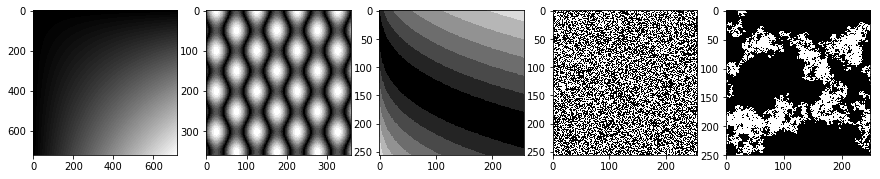

In [203]:
img_1 = first_assignment(1024, 1, 720, 6, 1).function_1()
img_2 = first_assignment(720, 32, 360, 4, 1).function_2()
img_3 = first_assignment(720, 1001, 256, 3, 1).function_3()
img_4 = first_assignment(1024, 1, 256, 3, 13).function_4()
img_5 = first_assignment(500, 1, 250, 8, 6666).function_5()

_ = plt.figure(figsize=(15,15))
_ = plt.subplot(1,5,1)
_ = plt.imshow(img_1, cmap='gray')
_ = plt.subplot(1,5,2)
_ = plt.imshow(img_2, cmap='gray')
_ = plt.subplot(1,5,3)
_ = plt.imshow(img_3, cmap='gray')
_ = plt.subplot(1,5,4)
_ = plt.imshow(img_4, cmap='gray')
_ = plt.subplot(1,5,5)
_ = plt.imshow(img_5, cmap='gray')

RMSE for figure 1: 9.810138
RMSE for figure 2: 4.139222
RMSE for figure 3: 8.512254
RMSE for figure 4: 10.082299
RMSE for figure 5: 0.401816


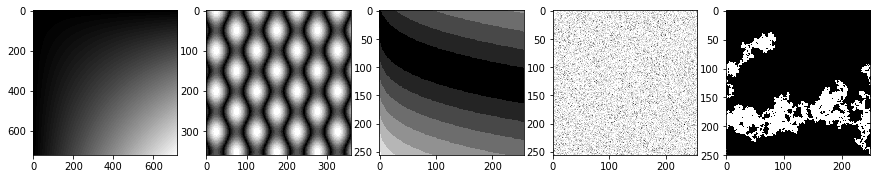

In [205]:
image_test1 = imageio.imread("dip_assignment1_examples/ex1_xy.png")
image_test2 = imageio.imread("dip_assignment1_examples/ex2_sin.png")
image_test3 = imageio.imread("dip_assignment1_examples/ex3_quad.png")
image_test4 = imageio.imread("dip_assignment1_examples/ex4_rand.png")
image_test5 = imageio.imread("dip_assignment1_examples/ex5_walk.png")

_ = plt.figure(figsize=(15,15))
_ = plt.subplot(1,5,1)
_ = plt.imshow(image_test1, cmap='gray')
_ = plt.subplot(1,5,2)
_ = plt.imshow(image_test2, cmap='gray')
_ = plt.subplot(1,5,3)
_ = plt.imshow(image_test3, cmap='gray')
_ = plt.subplot(1,5,4)
_ = plt.imshow(image_test4, cmap='gray')
_ = plt.subplot(1,5,5)
_ = plt.imshow(image_test5, cmap='gray')

print('RMSE for figure 1: {:f}'.format(RMSE(img_1, image_test1)))
print('RMSE for figure 2: {:f}'.format(RMSE(img_2, image_test2)))
print('RMSE for figure 3: {:f}'.format(RMSE(img_3, image_test3)))
print('RMSE for figure 4: {:f}'.format(RMSE(img_4, image_test4)))
print('RMSE for figure 5: {:f}'.format(RMSE(img_5, image_test5)))